In [123]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib.legend_handler import HandlerLine2D


# py -m pip install matplotlib

In [124]:
data = pd.read_csv('df_private_mtpl2.txt', sep="\t")

In [125]:
k = data['Churn'].value_counts()
k

Churn
0    1307371
1     106517
Name: count, dtype: int64

In [126]:
data['City'] = data['City'].str.replace(' ', '\n')

In [127]:
data['City'] = data['City'].replace('Other', 'Kita')

In [128]:
data['Duration'] = data['Duration'].replace('Long', 'Ilgalaikė')
data['Duration'] = data['Duration'].replace('Short', 'Trumpalaikė')

In [129]:
data['Make'] = data['Make'].replace('Other', 'Kita')

In [130]:
data = data[data['vehicle_type_group_mapped'] != 'Unknown']

In [131]:
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Personal', 'Asmeninis')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Motorcycle', 'Motociklas')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Tractor', 'Traktorius')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Trailer', 'Kemperis')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Delivery van', 'krovininis mikroautobusas')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Full trailer', 'Priekaba')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Truck over 3,5T', 'Sunkvežimis')

In [178]:
k = data['Channel'].value_counts()
k

Channel
Broker                    926549
Own Network               401641
E-Sales                    34926
Call Center                29548
Direct Corporate Sales     15003
Affinity                    6113
Key Account                  108
Name: count, dtype: int64

In [180]:
data['Channel'] = data['Channel'].str.replace('Key Account', 'Svarbių klientų')
data['Channel'] = data['Channel'].str.replace('Call Center', 'Skambučių centras')
data['Channel'] = data['Channel'].str.replace('E-Sales', 'El. Prekyba')
data['Channel'] = data['Channel'].str.replace('Broker', 'Brokeriai')
data['Channel'] = data['Channel'].str.replace('Affinity', 'Partnerių ir alternatyvių pardavimų')
data['Channel'] = data['Channel'].str.replace('Own Network', 'Pardavimų tinklas')
data['Channel'] = data['Channel'].str.replace('Direct Corporate Sales', 'Tiesioginių verslo klientų')

In [132]:
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace(' ', '\n')

In [133]:
data['Renewal'] = data['Renewal'].replace(0, 'Neatnaujinta')
data['Renewal'] = data['Renewal'].replace(1, 'Atnaujinta')

In [136]:
data['Gender'] = data['Gender'].str.replace('Male', 'Vyrai')
data['Gender'] = data['Gender'].str.replace('Female', 'Moterys')

In [137]:
g=data['Gender'].value_counts()
g

Gender
Vyrai      939578
Moterys    474310
Name: count, dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413888 entries, 0 to 1413887
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   PRODUCT                    1413888 non-null  object 
 1   Duration                   1413888 non-null  object 
 2   Vehicle_age                1413888 non-null  float64
 3   Make                       1413888 non-null  object 
 4   GWP                        1413888 non-null  float64
 5   vehicle_type_group_mapped  1413888 non-null  object 
 6   number_of_claims           1413888 non-null  float64
 7   Channel                    1413888 non-null  object 
 8   Churn                      1413888 non-null  int64  
 9   Renewal                    1413888 non-null  int64  
 10  Policy_Duration            1413888 non-null  float64
 11  Gender                     1413888 non-null  object 
 12  Client_Age                 1413888 non-null  float64
 13  City        

Churn rates by city:
Vyrai: 4.42%
Moterys: 4.72%

Moterys has the highest churn rate.


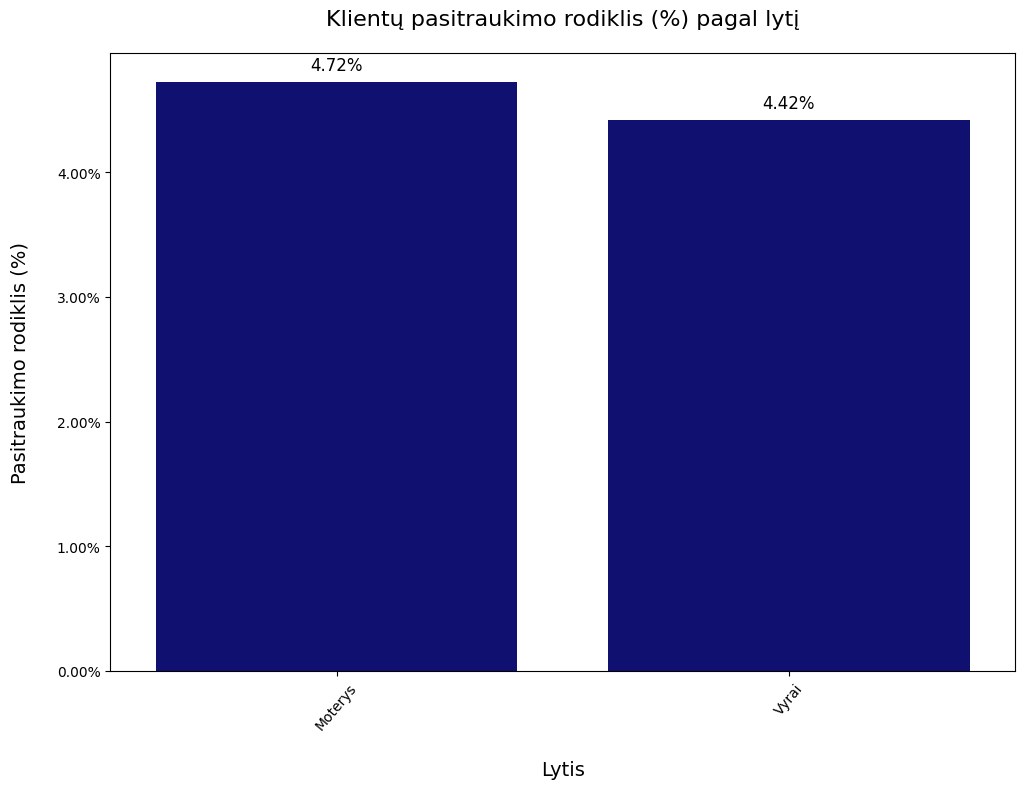

In [140]:
# CHURN RATE 

df = pd.DataFrame(data)

categories = df['Gender'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Gender'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Gender'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal lytį', fontsize=16, pad=20)
plt.xlabel('Lytis', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


In [143]:
# CHURN RATE 

df = pd.DataFrame(data)

categories = df['City'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['City'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['City'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 9))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal miestą', fontsize=16, pad=20)
plt.xlabel('Miestas', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
Kita: 4.11%
Vilnius: 4.76%
Kaunas: 4.58%
Vilniaus
rajonas: 5.16%
Klaipėda: 4.68%
Kauno
rajonas: 4.83%
Klaipėdos
rajonas: 5.39%
Panevėžio
rajonas: 4.88%
Panevėžys: 5.01%
Šiauliai: 4.99%
Telšiai: 3.11%
Jonava: 5.71%
Alytus: 5.39%
Alytaus
rajonas: 4.59%
Mažeikiai: 3.31%
Šiaulių
rajonas: 3.51%
Marijampolė: 4.73%
Marijampolės
rajonas: 5.41%

Jonava has the highest churn rate.


In [171]:
# CHURN RATE 

df = pd.DataFrame(data)

df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace(r'\d+\)', '', regex=True).str.strip()

# Filter out the "Unknown" category
df = df[df['vehicle_type_group_mapped'] != 'Unknown']

df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('Bus', 'Autobusas')

categories = df['vehicle_type_group_mapped'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['vehicle_type_group_mapped'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['vehicle_type_group_mapped'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal automobilio tipą', fontsize=16, pad=20)
plt.xlabel('Automobilio tipas', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
Asmeninis: 4.66%
krovininis
mikroautobusas: 4.76%
Kemperis: 1.80%
Motociklas: 2.97%
Priekaba: 5.32%
Sunkvežimis: 9.96%
Autobusas: 60.00%
Traktorius: 2.32%

Autobusas has the highest churn rate.


In [173]:
# CHURN RATE 

df = pd.DataFrame(data)


# Filter out the "Unknown" category
#df = df[df['number_of_claims'] != 'Unknown']


categories = df['number_of_claims'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['number_of_claims'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['number_of_claims'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])
churn_rate_df = churn_rate_df[churn_rate_df['Churn Rate'] > 0]

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal žalų skaičių', fontsize=16, pad=20)
plt.xlabel('Žalų skaičius', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
0.0: 4.53%
1.0: 4.37%
2.0: 4.15%
4.0: 6.30%
3.0: 4.29%
6.0: 4.66%
5.0: 5.06%
7.0: 7.20%
8.0: 4.80%
9.0: 18.75%
10.0: 0.00%
13.0: 0.00%
11.0: 22.50%
15.0: 0.00%

11.0 has the highest churn rate.


Churn rates by city:
Ilgalaikė: 6.02%
Trumpalaikė: 2.10%

Ilgalaikė has the highest churn rate.


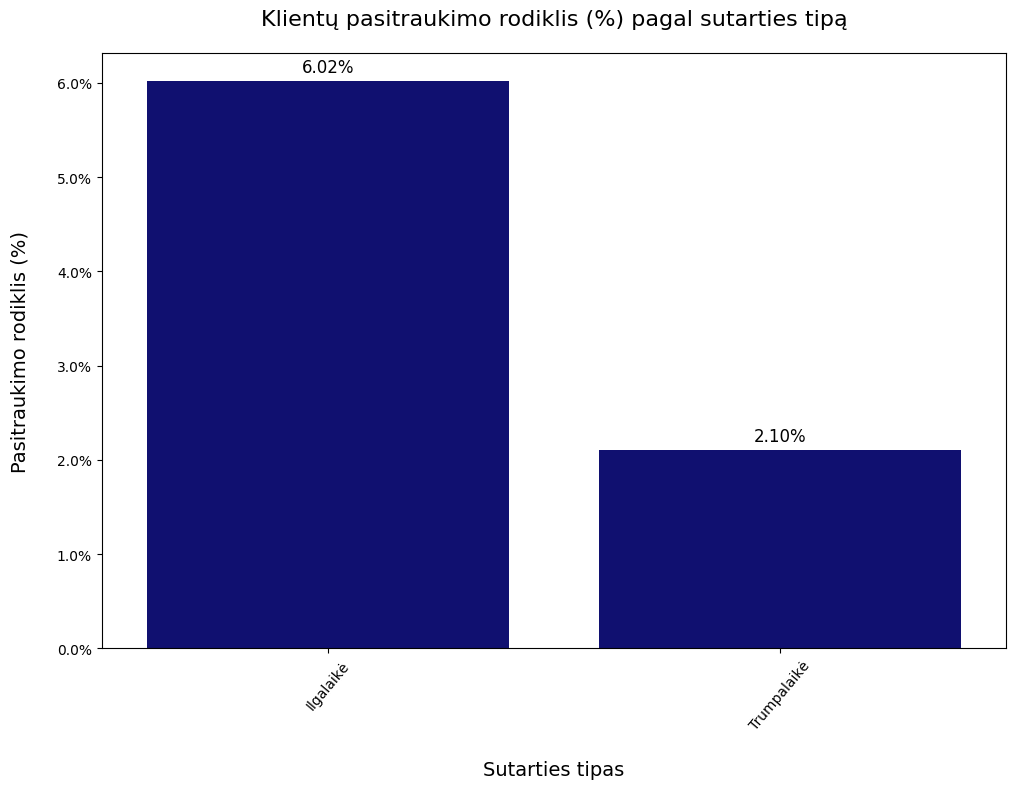

In [174]:
# CHURN RATE 

df = pd.DataFrame(data)


# Filter out the "Unknown" category
#df = df[df['number_of_claims'] != 'Unknown']


categories = df['Duration'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Duration'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Duration'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal sutarties tipą', fontsize=16, pad=20)
plt.xlabel('Sutarties tipas', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
Brokeriai: 3.97%
Pardavimų tinklas: 5.61%
El. Prekyba: 4.33%
Tiesioginių verslo klientų: 6.03%
Skambučių centras: 6.04%
Partnerių ir alternatyvių pardavimų: 5.99%
Svarbių klientų: 8.33%

Svarbių klientų has the highest churn rate.


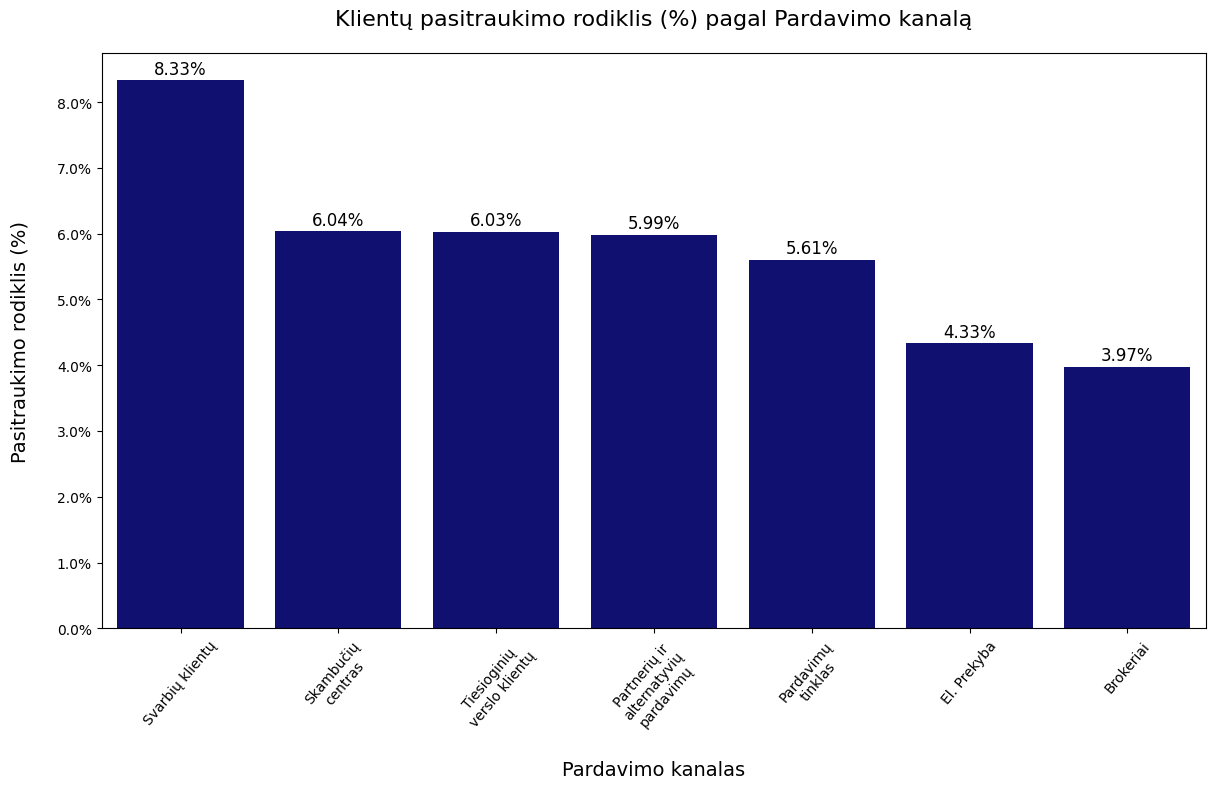

In [183]:
# CHURN RATE 
import textwrap

df = pd.DataFrame(data)


# Filter out the "Unknown" category
#df = df[df['number_of_claims'] != 'Unknown']


categories = df['Channel'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Channel'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Channel'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

def add_line_breaks(text, max_length=15):
    # Split the text at max_length characters
    return '\n'.join(textwrap.wrap(text, max_length))

# Apply the function to each category name
churn_rate_df['Category'] = churn_rate_df['Category'].apply(add_line_breaks)

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)




plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal Pardavimo kanalą', fontsize=16, pad=20)
plt.xlabel('Pardavimo kanalas', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


In [158]:
# CHURN RATE 

df = pd.DataFrame(data)

categories = df['Make'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Make'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Make'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal markę', fontsize=16, pad=20)
plt.xlabel('Markė', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
VW: 4.56%
KIA: 4.57%
FORD: 4.32%
SUBARU: 4.66%
TOYOTA: 4.32%
SKODA: 4.61%
MERCEDES BENZ: 5.45%
VOLVO: 4.32%
MITSUBISHI: 4.12%
AUDI: 4.60%
HONDA: 3.99%
Kita: 3.85%
OPEL: 4.26%
HYUNDAI: 4.42%
BMW: 5.30%
CITROEN: 4.50%
NISSAN: 4.57%
RENAULT: 4.66%
PEUGEOT: 4.60%
SUZUKI: 3.38%
MAZDA: 4.83%
CHRYSLER: 5.11%
LEXUS: 5.69%

LEXUS has the highest churn rate.


In [141]:
df = pd.DataFrame(data)

age_groups = [(18, 26), (26, 31), (31, 36), (36, 41), (41, 46), (46, 51), (51, 56), (56, 61), (61, 66)]

def categorize_age(age, age_groups):
    for lower, upper in age_groups:
        if lower <= age < upper:
            return f'{lower}-{upper - 1}'
    return '65+'

df['Age_Group'] = df['Client_Age'].apply(lambda age: categorize_age(age, age_groups))

churn_rate_by_age_group = df.groupby('Age_Group').agg({
    'Churn': 'sum',
    'Client_Age': 'count'
}).rename(columns={'Client_Age': 'Total_Clients'}).reset_index()

churn_rate_by_age_group['Churn Rate'] = (churn_rate_by_age_group['Churn'] / churn_rate_by_age_group['Total_Clients']) * 100 * 0.6

#sorted_churn_rate_by_age_group = churn_rate_by_age_group.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Age_Group', y='Churn Rate', data=churn_rate_by_age_group, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal kliento amžių', fontsize=16, pad=20)
plt.xlabel('Kliento amžius', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_28168\2698755485.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_vehicle_age_group = df.groupby('Vehicle_Age_Group').agg({


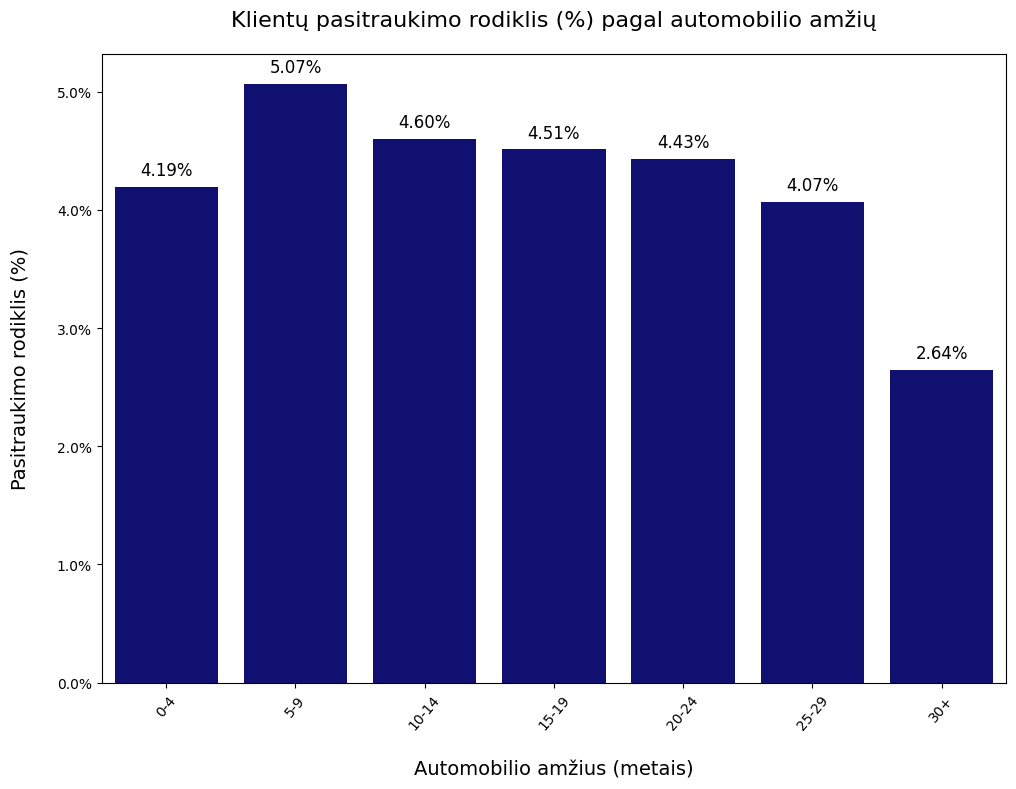

In [168]:
df = pd.DataFrame(data)

vehicle_age_groups = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)]

def categorize_vehicle_age(vehicle_age, vehicle_age_groups):
    for lower, upper in vehicle_age_groups:
        if lower <= vehicle_age < upper:
            return f'{lower}-{upper - 1}'
    return '30+'

df['Vehicle_Age_Group'] = df['Vehicle_age'].apply(lambda age: categorize_vehicle_age(age, vehicle_age_groups))

# Define the order of categories as they should appear on the x-axis
category_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+']

# Convert 'Vehicle_Age_Group' to a categorical type with the defined order
df['Vehicle_Age_Group'] = pd.Categorical(df['Vehicle_Age_Group'], categories=category_order, ordered=True)

churn_rate_by_vehicle_age_group = df.groupby('Vehicle_Age_Group').agg({
    'Churn': 'sum',
    'Vehicle_age': 'count'
}).rename(columns={'Vehicle_age': 'Total_Vehicles'}).reset_index()

# Calculate churn rate
churn_rate_by_vehicle_age_group['Churn Rate'] = (churn_rate_by_vehicle_age_group['Churn'] / churn_rate_by_vehicle_age_group['Total_Vehicles']) * 100 * 0.6

# Make sure to sort the DataFrame by the categorical column before plotting
churn_rate_by_vehicle_age_group = churn_rate_by_vehicle_age_group.sort_values('Vehicle_Age_Group')


plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Vehicle_Age_Group', y='Churn Rate', data=churn_rate_by_vehicle_age_group, color='navy')
plt.xticks(rotation=50)

plt.title('Klientų pasitraukimo rodiklis (%) pagal automobilio amžių', fontsize=16, pad=20)
plt.xlabel('Automobilio amžius (metais)', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [153]:
df = pd.DataFrame(data)

driving_experience_groups = [(0, 6), (6, 11), (11, 16), (16, 21), (21, 26), (26, 31)]

def categorize_driving_experience(years, driving_experience_groups):
    for lower, upper in driving_experience_groups:
        if lower <= years < upper:
            return f'{lower}-{upper - 1}'
    return '30+'

df['Driving_Experience_Group'] = df['Years_of_driving'].apply(lambda years: categorize_driving_experience(years, driving_experience_groups))

churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({
    'Churn': 'sum',
    'Years_of_driving': 'count'
}).rename(columns={'Years_of_driving': 'Total_Drivers'}).reset_index()


experience_order = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']
df['Driving_Experience_Group'] = pd.Categorical(df['Driving_Experience_Group'], categories=experience_order, ordered=True)

# Sort the DataFrame by 'Driving_Experience_Group' using the ordered categorical
churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({
    'Churn': 'sum',
    'Years_of_driving': 'count'
}).rename(columns={'Years_of_driving': 'Total_Drivers'}).reset_index()

churn_rate_by_driving_experience_group['Churn Rate'] = (churn_rate_by_driving_experience_group['Churn'] / churn_rate_by_driving_experience_group['Total_Drivers']) * 100 * 0.6

churn_rate_by_driving_experience_group['Driving_Experience_Group'] = pd.Categorical(
    churn_rate_by_driving_experience_group['Driving_Experience_Group'],
    categories=experience_order,
    ordered=True
)

churn_rate_by_driving_experience_group = churn_rate_by_driving_experience_group.sort_values('Driving_Experience_Group')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Driving_Experience_Group', y='Churn Rate', data=churn_rate_by_driving_experience_group, color='navy')
plt.xticks(rotation=50)

plt.title('Klientų pasitraukimo rodiklis (%) pagal vairavimo stažą', fontsize=16, pad=20)
plt.xlabel('Vairavimo stažas (metais)', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_28168\3851206474.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({


C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_28168\4158071299.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_Policy_Duration_groups = df.groupby('Policy_Duration_groups').agg({


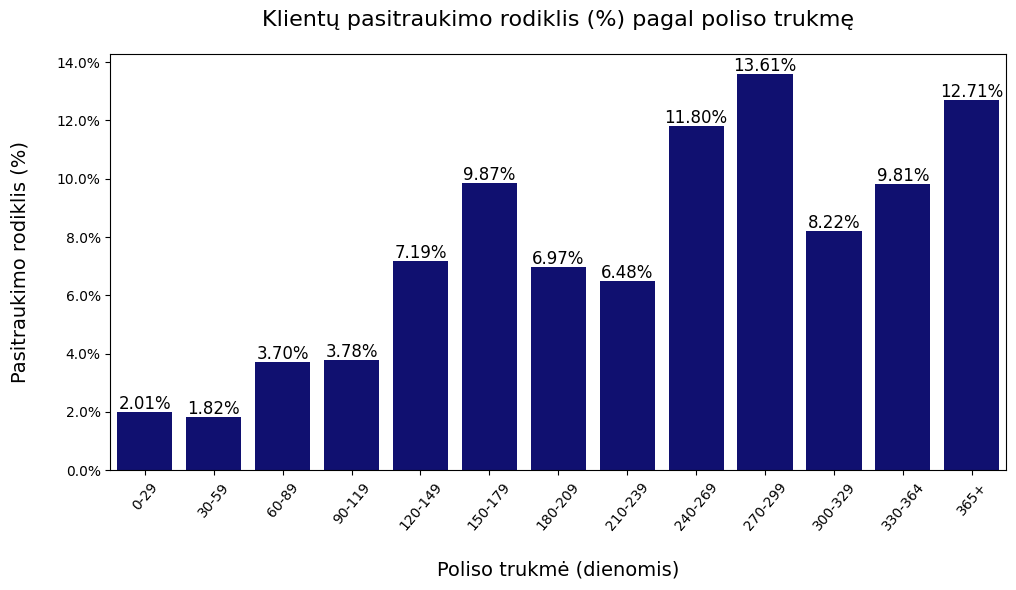

In [184]:
df = pd.DataFrame(data)

Policy_Duration_groups = [(0, 30), (30, 60), (60, 90), (90, 120), (120, 150), (150, 180), (180, 210), (210, 240), (240, 270), (270, 300), (300, 330), (330, 365)]

def categorize_driving_experience(years, Policy_Duration_groups):
    for lower, upper in Policy_Duration_groups:
        if lower <= years < upper:
            return f'{lower}-{upper - 1}'
    return '365+'

df['Policy_Duration_groups'] = df['Policy_Duration'].apply(lambda years: categorize_driving_experience(years, Policy_Duration_groups))

duration_order = [f'{lower}-{upper - 1}' for (lower, upper) in Policy_Duration_groups] + ['365+']

df['Policy_Duration_groups'] = pd.Categorical(df['Policy_Duration_groups'], categories=duration_order, ordered=True)

churn_rate_by_Policy_Duration_groups = df.groupby('Policy_Duration_groups').agg({
    'Churn': 'sum',
    'Policy_Duration': 'count'
}).rename(columns={'Policy_Duration': 'Total_Drivers'}).reset_index()

churn_rate_by_Policy_Duration_groups['Churn Rate'] = (churn_rate_by_Policy_Duration_groups['Churn'] / churn_rate_by_Policy_Duration_groups['Total_Drivers']) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Policy_Duration_groups', y='Churn Rate', data=churn_rate_by_Policy_Duration_groups, color='navy')
plt.xticks(rotation=50)

plt.title('Klientų pasitraukimo rodiklis (%) pagal poliso trukmę', fontsize=16, pad=20)
plt.xlabel('Poliso trukmė (dienomis)', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_28168\980523025.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_policy_price_group = df.groupby('Policy_Price_Group').agg({


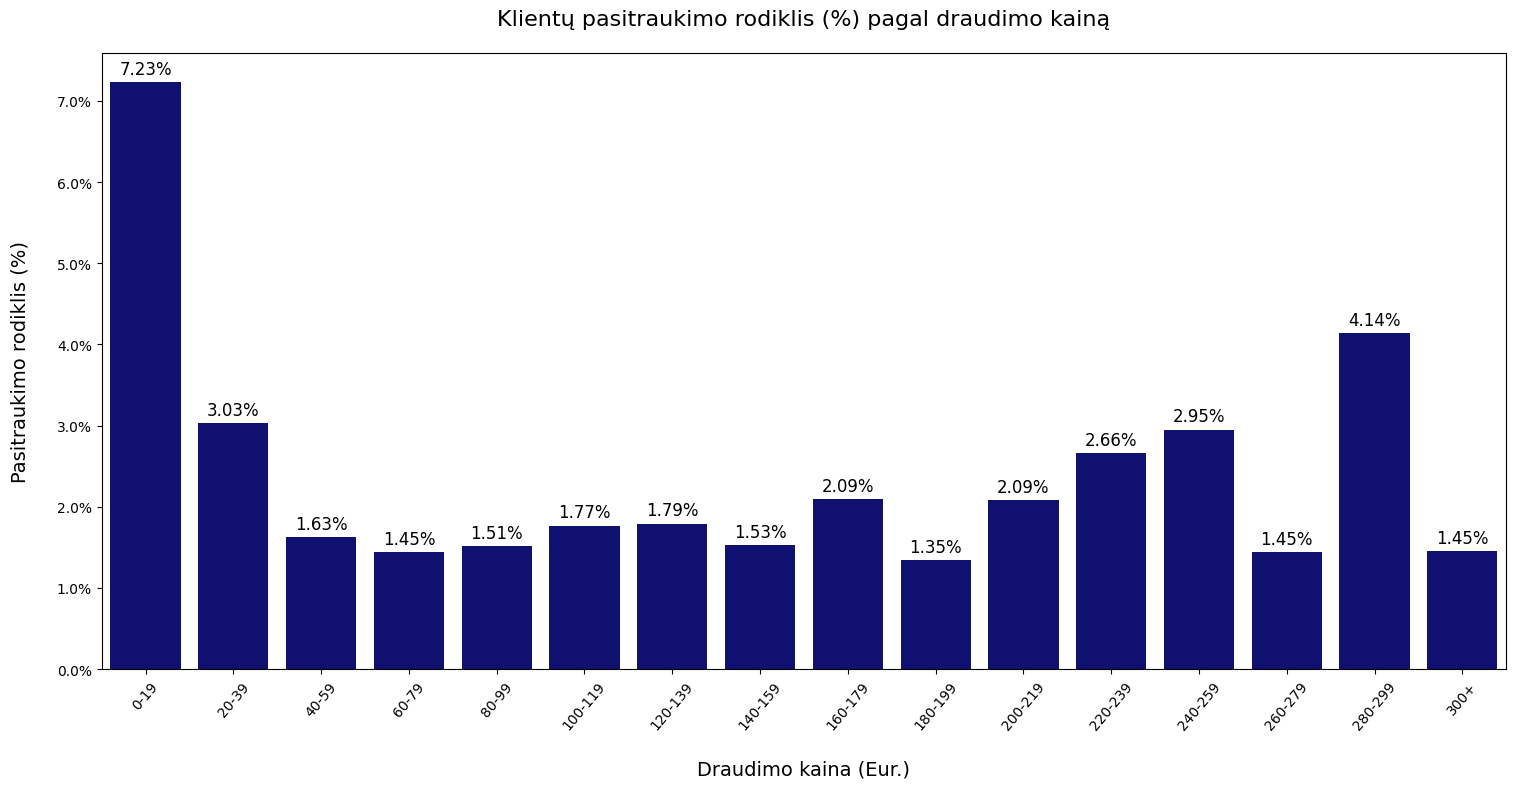

In [185]:
df = pd.DataFrame(data)

max_price = df['GWP'].max()
bins = list(range(0, 301, 20)) + [max_price]

bins[-2] = 300
bins[-1] = 300 + max_price

bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + ['300+']

df['Policy_Price_Group'] = pd.cut(df['GWP'], bins=bins, labels=bin_labels, right=False)

churn_rate_by_policy_price_group = df.groupby('Policy_Price_Group').agg({
    'Churn': 'sum',
    'GWP': 'count'
}).rename(columns={'GWP': 'Total_Policies'}).reset_index()

churn_rate_by_policy_price_group['Churn Rate'] = (churn_rate_by_policy_price_group['Churn'] / churn_rate_by_policy_price_group['Total_Policies']) * 100 * 0.6

sorted_churn_rate_by_policy_price_group = churn_rate_by_policy_price_group.sort_values('Policy_Price_Group', ascending=True)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Policy_Price_Group', y='Churn Rate', data=sorted_churn_rate_by_policy_price_group, color='navy')
plt.xticks(rotation=50)
#plt.xticks([0, 1], ['Ilgalaikė sutartis', 'Trumpalaikė sutartis'])
plt.title('Klientų pasitraukimo rodiklis (%) pagal draudimo kainą', fontsize=16, pad=20)
plt.xlabel('Draudimo kaina (Eur.)', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [118]:
df['number_of_claims'] = df['number_of_claims'].astype('category')
df['Churn'] = df['Churn'].astype('category')
df['Renewal'] = df['Renewal'].astype('category')

In [119]:
# Aprašomoji statistika skaitmeniniams kintamiesiems
pd.options.display.float_format = '{:.2f}'.format

numerical_description = df.describe()
print(numerical_description)


       Vehicle_age        GWP  Policy_Duration  Client_Age  Years_of_driving
count   1413888.00 1413888.00       1413888.00  1413888.00        1413888.00
mean         14.83      27.81           254.55       45.45             21.00
std           6.79      24.19           144.23       13.94             10.92
min           0.00       0.00             0.00       18.00              0.00
25%          11.00       8.50            91.00       34.00             13.00
50%          15.00      23.64           364.00       45.00             21.00
75%          19.00      39.00           364.00       55.00             27.00
max          70.00    1270.00           396.00       90.00             72.00


In [92]:
categorical_description = df.describe(include=['object', 'bool', 'category'])
print(categorical_description)

# Arba galite gauti dažnio lentelę kiekvienam kategoriniam kintamajam atskirai
for col in df.select_dtypes(include=['object', 'bool', 'category']).columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

        PRODUCT Duration     Make vehicle_type_group_mapped  number_of_claims  \
count   1441782  1441782  1441782                   1441782        1441782.00   
unique        2        2       23                         9             14.00   
top        MTPL     Long       VW               6) Personal              0.00   
freq    1247098   889564   205772                   1332968        1355632.00   

        Channel    Churn  Renewal   Gender     City Policy_Price_Group  
count   1441782  1441782  1441782  1441782  1441782            1439957  
unique        7        2        2        2       18                 16  
top      Broker        0        0     Male    Other               0-19  
freq     943437  1332074   745399   957821   549593             627862  
Value counts for PRODUCT:
PRODUCT
MTPL    1247098
MOD      194684
Name: count, dtype: int64


Value counts for Duration:
Duration
Long     889564
Short    552218
Name: count, dtype: int64


Value counts for Make:
Make
VW         

In [93]:
class_counts_resampled = pd.Series(df['Churn']).value_counts()

In [94]:
class_counts_resampled 

Churn
0    1332074
1     109708
Name: count, dtype: int64

In [187]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100 * x
sns.set(style="whitegrid") 

fig, ax = plt.subplots(figsize=(6, 7))
ax.pie(churn_counts, labels=['Nenutrauktos sutartys', 'Nutrauktos sutartys'], autopct='%1.1f%%', startangle=90, colors=['#4682B4', '#FF6347'],  textprops={'fontsize': 14})
ax.set_title('Sutarčių pasiskirstymas (%)', fontsize=15)
ax.axis('equal')  

plt.show()

In [107]:
key_account_df = df[df['Channel'] == 'Key Account']

key_account_count = key_account_df.shape[0]

print("Number of 'Key account' entries:", key_account_count)

Number of 'Key account' entries: 111
